# Regresyon (Karar) Ağaçları

# CART

In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [3]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [4]:
cart_model = DecisionTreeRegressor(min_samples_split = 2)

In [5]:
# ?cart_model

In [6]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor()

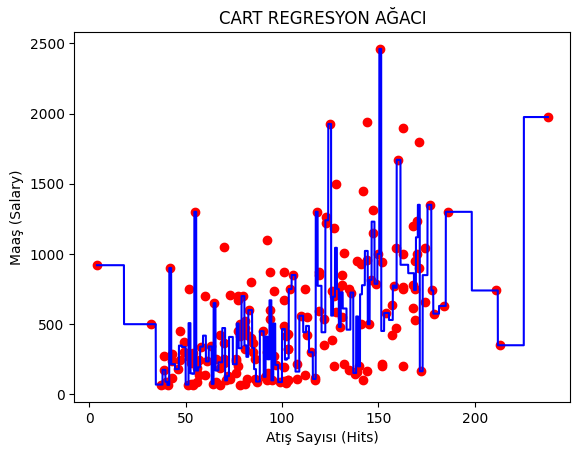

In [11]:
X_grid = np.arange(min(np.array(X_train)), max(np.array(X_train)), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))  
plt.scatter(X_train, y_train, color = 'red') 
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')  
plt.title('CART REGRESYON AĞACI')  
plt.xlabel('Atış Sayısı (Hits)') 
plt.ylabel('Maaş (Salary)');

In [12]:
from skompiler import skompile

In [14]:
print(skompile(cart_model.predict).to('python/code'))

ModuleNotFoundError: No module named 'astor'

## Tahmin

In [15]:
x = [91]

In [17]:
# Hata veren satırda bu aşağıdaki çıktı veriliyor videoda
# ve o çıktı ileride kullanılmak üzere aşağıya konuluyor.

In [18]:
(345.2011551724138 if x[0] <= 117.5 else ((((1300.0 if x[0] <= 118.5 else 
    641.0) if x[0] <= 122.5 else 1468.5236666666667) if x[0] <= 125.5 else 
    621.9679230769232) if x[0] <= 143.0 else (958.6111111111111 if x[0] <= 
    150.5 else 2460.0) if x[0] <= 151.5 else 499.1666666666667 if x[0] <= 
    157.5 else 892.5402413793104) if x[0] <= 225.5 else 1975.0)

345.2011551724138

In [19]:
cart_model.predict(X_test)[0:5]

array([ 725.    , 1230.    ,  725.    ,  504.1665,   67.5   ])

In [20]:
cart_model.predict([[91]])

array([125.])

In [21]:
y_pred =cart_model.predict(X_test)

In [22]:
np.sqrt(mean_squared_error(y_test, y_pred))

468.49579052913884

## Model Tuning

In [23]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

In [24]:
np.sqrt(mean_squared_error(y_test, y_pred))

468.49579052913884

In [27]:
cart_params = {"min_samples_split": range(2, 100),
               "max_leaf_nodes": range(2, 10)}

In [28]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv=10)

In [29]:
cart_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 100)})

In [30]:
cart_cv_model.best_params_

{'max_leaf_nodes': 9, 'min_samples_split': 76}

In [31]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes = 9, min_samples_split = 37)

In [32]:
cart_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split=37)

In [33]:
y_pred = cart_tuned.predict(X_test)

In [34]:
np.sqrt(mean_squared_error(y_test, y_pred))

434.2326688144208